In [1]:
DATASET_PATH = 'Dataset/'

In [19]:


import pandas as pd
import numpy as np
from scipy.io import wavfile
import librosa
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 12]

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

# set seed for reproducibility
np.random.seed(0)

In [3]:
# print the content of 
contents = os.listdir(DATASET_PATH)
for c in contents:
    print(c)

cv-invalid
cv-invalid.csv
cv-other-dev
cv-other-dev.csv
cv-other-test
cv-other-test.csv
cv-other-train
cv-other-train.csv
cv-valid-dev
cv-valid-dev.csv
cv-valid-test
cv-valid-test.csv
cv-valid-train
cv-valid-train.csv
LICENSE.txt
README.txt


In [4]:
# import datasets
df_train = pd.read_csv(DATASET_PATH + 'cv-valid-train.csv')
df_test = pd.read_csv(DATASET_PATH + 'cv-valid-test.csv')
df_train.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN


In [5]:
df_train.describe()

,up_votes,down_votes,duration
count,195776.000000,195776.000000,0.0
mean,2.527281,0.150866,NaN
std,7.084358,1.593051,NaN
min,1.000000,0.000000,NaN
25%,1.000000,0.000000,NaN
50%,2.000000,0.000000,NaN
75%,3.000000,0.000000,NaN
max,973.000000,528.000000,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195776 entries, 0 to 195775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   filename    195776 non-null  object 
 1   text        195776 non-null  object 
 2   up_votes    195776 non-null  int64  
 3   down_votes  195776 non-null  int64  
 4   age         73768 non-null   object 
 5   gender      74059 non-null   object 
 6   accent      64711 non-null   object 
 7   duration    0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ MB


In [7]:
df_train.isnull().sum()

filename           0
text               0
up_votes           0
down_votes         0
age           122008
gender        121717
accent        131065
duration      195776
dtype: int64

In [8]:
print(f'Train set shape: {df_train.shape}')
print(f'Test set shape: {df_test.shape}')

Train set shape: (195776, 8)
Test set shape: (3995, 8)


In [9]:
measurer = np.vectorize(len)
max_str_length = measurer(df_train.text.astype(str)).max(axis=0)
print('The maximum text length in the training set is of length ' + str(max_str_length))

The maximum text length in the training set is of length 191


In [10]:
df_train.age.unique()

array([nan, 'twenties', 'seventies', 'thirties', 'sixties', 'fifties',
       'fourties', 'teens', 'eighties'], dtype=object)

In [11]:
df_train.gender.unique()

array([nan, 'female', 'male', 'other'], dtype=object)

In [22]:
def savefig(name):
    plt.xlabel(name[0].upper() + name[1:], labelpad=14)
    plt.ylabel("Count of People", labelpad=14)
    plt.savefig(f'Images/{name}.png')

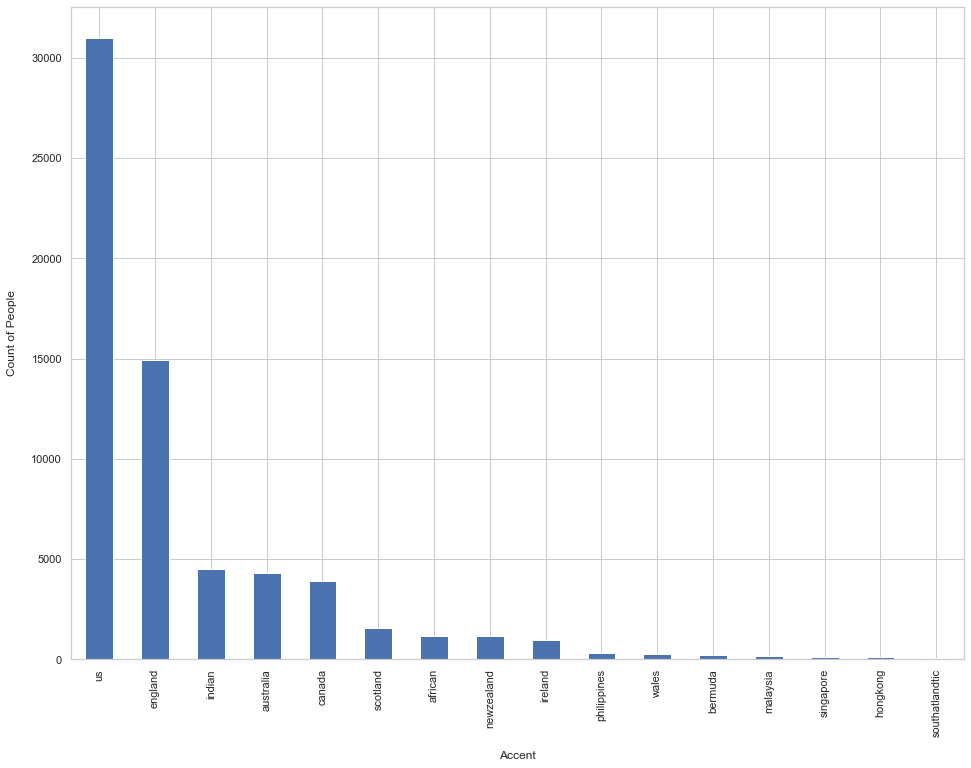

In [23]:
df_train.accent.value_counts().plot.bar()
savefig('accent')

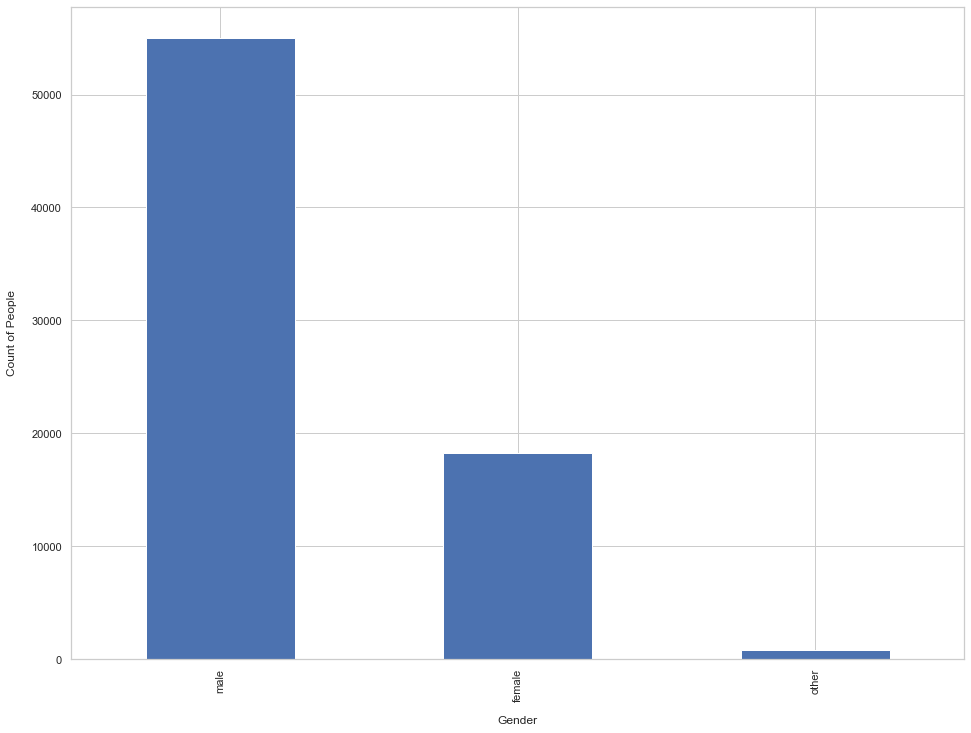

In [24]:
df_train.gender.value_counts().plot.bar()
savefig('gender')

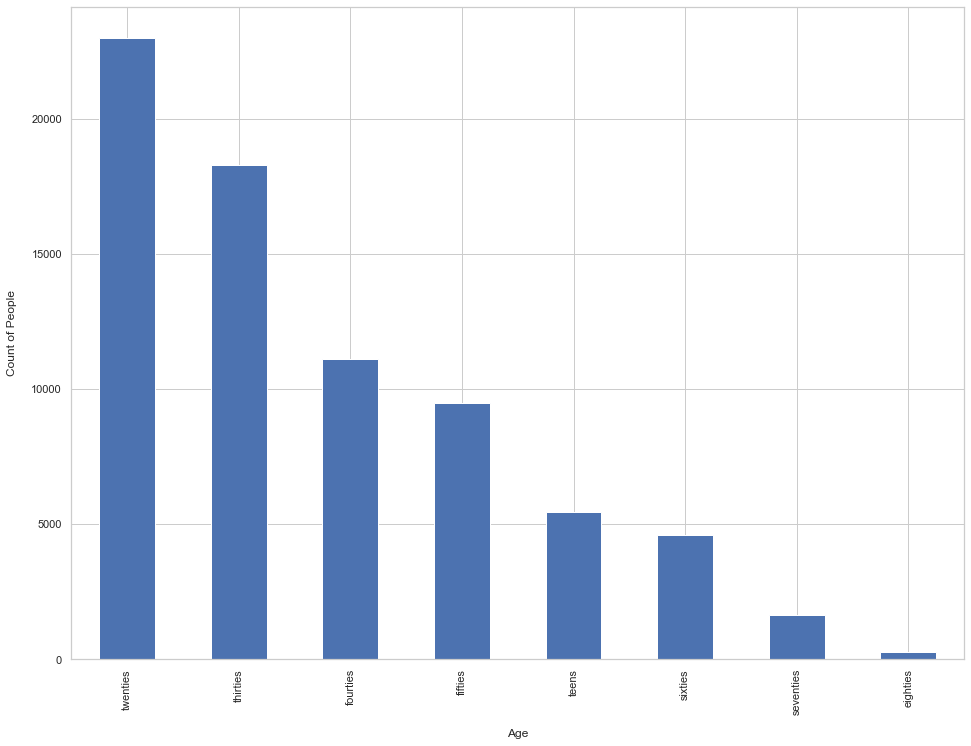

In [25]:
df_train.age.value_counts().plot.bar()
savefig('age')

In [28]:
df_train.duration.mean(skipna = True)

nan

In [30]:
df_train.duration.unique()

array([nan])